In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
plt.switch_backend('TKAgg')
sns.set_context('poster')
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('colorblind'))

In [2]:
df = pd.concat([pd.read_csv(i) for i in glob('../drift_definition/results/*.csv')])
# This is going to include results from the mean depth maps - we can drop them
df = df[df['Year'] != 'Mean_Depth']
df['Year'].unique()

array([2018, 2017, 2016, 2015, 2012, 2013], dtype=object)

In [ ]:
a = df.copy().groupby('Study Area').mean()
clpx_mean_thresh = a.loc['CLPX']['Inflection Threshold']
hv_mean_thresh = a.loc['Happy Valley']['Inflection Threshold']
# tuol_mean_thresh = a.loc['Tuolumne']['Inflection Threshold']
a.head()

In [ ]:
#a.to_csv('drift_defintion_results_mean_by_study_area.to_csv')

In [ ]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Drift Threshold (pct. of mean depth)", y="Drift Volume-Area Difference (pct.)",
             hue="Study Area", data=mean_df)

plt.axvline(x=clpx_mean_thresh, alpha=0.4, c=sns.color_palette('colorblind')[0])
plt.axvline(x=hv_mean_thresh, alpha=0.4, c=sns.color_palette('colorblind')[1])
#plt.axvline(x=tuol_mean_thresh, alpha=0.4, c=sns.color_palette('colorblind')[2])

plt.suptitle('Drift Volume - Drift Area (%)')
plt.title('Vertical Lines are Mean Inflection Thresholds, Shaded Area is 95% Confidence Interval')

#plt.savefig('delta_curves_thresholds_study_area_hue.png', dpi=300, bbox_inches='tight')

In [ ]:
sns.lmplot(x="CV", y="Inflection Threshold", hue='Study Area', data=df, height=16, aspect=1.5, truncate=True)

In [ ]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Drift Threshold (pct. of mean depth)", y="Drift Volume-Area Difference (pct.)",
             hue="Study Area", style="Year", data=df)

In [2]:
df = pd.concat([pd.read_csv(i) for i in glob('../drift_definition/results/*.csv')])
df = df[df['Year'] != 'Mean_Depth']
b = df.groupby(['Study Area', 'Year']).mean()
b['Year'] = [x[1] for x in b.index.values]
b['Study Area'] = [x[0] for x in b.index.values]
b

Drift Threshold (pct. of mean depth)    drift_area  \
Study Area   Year                                                       
CLPX         2012                                 140.0  2.104038e+07   
             2013                                 140.0  1.803872e+07   
             2015                                 140.0  2.611449e+07   
             2016                                 140.0  2.192959e+07   
             2017                                 140.0  2.328982e+07   
             2018                                 140.0  2.507083e+07   
Happy Valley 2012                                 140.0  4.237045e+06   
             2013                                 140.0  4.699865e+06   
             2015                                 140.0  5.896099e+06   
             2016                                 140.0  5.624747e+06   
             2017                                 140.0  6.354435e+06   
             2018                                 140.0  6.955160e+06   

                   drift_volume  mean_drift_depth  mean_not_drift_depth  \
Study Area   Year                                                         
CLPX         2012  1.288823e+07          0.699060              0.252347   
             2013  1.263829e+07          0.910927              0.450540   
             2015  2.229116e+07          0.994810              0.401320   
             2016  1.490911e+07          0.845545              0.379089   
             2017  1.820044e+07          0.924096              0.388696   
             2018  2.333248e+07          1.104662              0.422215   
Happy Valley 2012  3.403694e+06          0.969635              0.377929   
             2013  4.106957e+06          1.054875              0.439379   
             2015  5.484391e+06          1.223168              0.629242   
             2016  3.947154e+06          0.923069              0.458002   
             2017  5.613714e+06          1.068882              0.417535   
             2018  6.073248e+06          1.018899              0.346525   

                   not_drift_area  not_drift_volume  \
Study Area   Year                                     
CLPX         2012    5.606435e+07      1.493141e+07   
             2013    6.069914e+07      2.875079e+07   
             2015    6.931154e+07      2.965831e+07   
             2016    7.127364e+07      2.824551e+07   
             2017    7.097938e+07      2.883223e+07   
             2018    6.870680e+07      3.080896e+07   
Happy Valley 2012    1.470906e+07      5.732516e+06   
             2013    1.597669e+07      7.252255e+06   
             2015    2.263028e+07      1.472004e+07   
             2016    2.062897e+07      9.811966e+06   
             2017    2.147505e+07      9.272365e+06   
             2018    2.098246e+07      7.574418e+06   

                   Drift Threshold (pct. of mean depth).1  Drift Area pct.  \
Study Area   Year                                                            
CLPX         2012                                   140.0        27.288053   
             2013                                   140.0        22.909848   
             2015                                   140.0        27.366212   
             2016                                   140.0        23.528788   
             2017                                   140.0        24.705653   
             2018                                   140.0        26.734339   
Happy Valley 2012                                   140.0        22.363678   
             2013                                   140.0        22.730404   
             2015                                   140.0        20.668938   
             2016                                   140.0        21.424577   
             2017                                   140.0        22.833462   
             2018                                   140.0        24.895323   

                   Not Drift Area pct.  Drift Volume pct.  \
Study Area   Year   

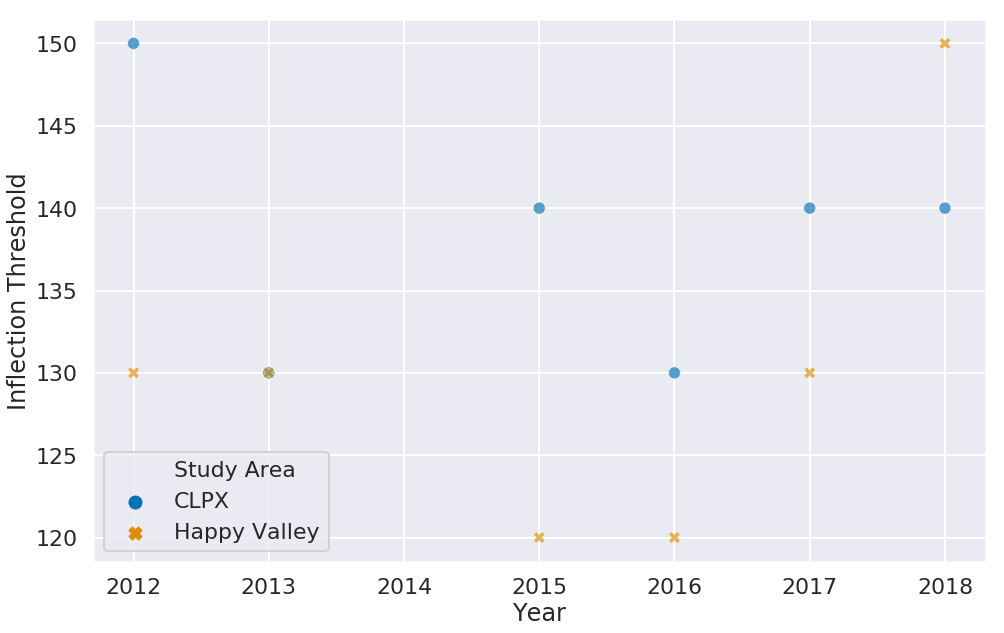

In [19]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="Year", y="Inflection Threshold", hue="Study Area", style='Study Area', alpha=0.66, data=b)

In [ ]:
df['Year'].plot()

In [ ]:
#df2.set_index(['Study Area', 'Year'], inplace=True)

In [ ]:
df2 = df.copy()
a = df2.groupby(['Study Area','Year'])
a['Drift Volume-Area Difference'].apply(lambda x: np.gradient(x).argmin())

In [ ]:
pcts = np.arange(0.8,2.1,0.1) * 100
idx = a['Drift Volume-Area Difference'].apply(lambda x: np.gradient(x).argmin()).values

In [ ]:
p = []
for i in idx:
    p.append(pcts[i])
np.mean(p)

In [ ]:
df3 = df.copy()
a = df2.groupby('Drift Threshold (% of mean depth)').mean()
a['gradient'] = np.gradient(a['Drift Volume-Area Difference'])
a.gradient

In [ ]:
a.gradient.argmin()

In [ ]:
clpx17 = pd.read_csv('drift_thresholds_CLPX_2017.csv')
clpx17.head()

In [ ]:
plt.plot(np.gradient(clpx17['Drift Volume-Area Difference']))